### 1、实现对获取的电影数据的统计分析
+ 可以考虑类型、语言、地区或演员的特征维度
+ 可以考虑多对简介、影评进行语义分析出来的结果进行统计
+ 绘制相关图形

In [36]:
# loading packages
import pandas as pd
import csv
import matplotlib.pyplot as plt
from snownlp import SnowNLP
# make Chinese can show normally
from pylab import mpl
# use default font
mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False

In [46]:
# loading the csv file
df = pd.read_csv("爬取的数据/豆瓣250电影信息.csv")
df.fillna(0)
# datas what we need is the area that film first show and film type
areas = df['首映地区']
types = df['类型']
introduction = df["简介"]
comments = df["短评"]
areas,types,introduction,comments

(0             美国
 1      中国大陆 中国香港
 2             美国
 3          法国 美国
 4             美国
          ...    
 245           英国
 246         中国香港
 247        美国 英国
 248        伊朗 法国
 249       美国 俄罗斯
 Name: 首映地区, Length: 250, dtype: object, 0            犯罪 剧情
 1         剧情 爱情 同性
 2            剧情 爱情
 3         剧情 动作 犯罪
 4         剧情 爱情 灾难
           ...     
 245       犯罪 悬疑 惊悚
 246    动作 犯罪 剧情 惊悚
 247       动作 历史 战争
 248          剧情 家庭
 249    剧情 犯罪 悬疑 惊悚
 Name: 类型, Length: 250, dtype: object, 0                                                    NaN
 1      ã€€ã€€æ®µå°�æ¥¼ï¼ˆå¼ ä¸°æ¯…ï¼‰ä¸�ç¨‹è�¶è¡£ï¼ˆå...
 2      阿甘（汤姆·汉克斯 饰）于二战结束后不久出生在美国南方阿拉巴马州一个闭塞的小镇，他先天弱智，...
 3      ã€€ã€€é‡Œæ˜‚ï¼ˆè®©Â·é›·è¯ºé¥°ï¼‰æ˜¯å��å­¤ç‹¬çš...
 4      ã€€ã€€1912å¹´4æœˆ10æ—¥ï¼Œå�·ç§° â€œä¸–ç•Œå·¥ä¸...
                              ...                        
 245    比尔（杰里米•希尔伯德 Jeremy Theobald 饰）是个游手好闲的作家，借跟踪陌生人...
 246    1991年，香港黑帮龙头倪坤被杀，倪氏家族旗下五大头目中除韩琛（曾志伟）外，均伺机背叛发难，...
 247    1992年，连年的部落战争令东非国家索马里山河破败，民不聊生，由

In [47]:
# use dict to save all kinds of film type and first show area
types_dict = {}
areas_dict = {}
# start use for loop to traverse
# due to many film has several values
for area in areas:
    if area not in areas_dict:
        areas_dict[area] = 1
    else:
        areas_dict[area] += 1
# data fixing
new_areas_dict = {}
for key,value in areas_dict.items():
    # use split(" ") to cut and look it's length
    if len(key.split(" ")) == 1:
        if key not in new_areas_dict:
            new_areas_dict[key] = value
        else:
            new_areas_dict[key] += value
    else:
        for k in key.split(" "):
            if k not in new_areas_dict:
                new_areas_dict[k] = value
            else:
                new_areas_dict[k] += value
new_areas_dict

{'美国': 136,
 '中国大陆': 23,
 '中国香港': 29,
 '法国': 20,
 '意大利': 10,
 '日本': 35,
 '英国': 36,
 '加拿大': 7,
 '印度': 4,
 '瑞士': 4,
 '德国': 17,
 '韩国': 12,
 '黎巴嫩': 1,
 '新西兰': 3,
 '中国台湾': 8,
 '1964(中国大陆)': 1,
 '波兰': 1,
 '澳大利亚': 7,
 '南非': 3,
 '西班牙': 4,
 '伊朗': 2,
 '丹麦': 1,
 '瑞典': 2,
 '巴西': 2,
 '荷兰': 1,
 '奥地利': 1,
 '阿根廷': 1,
 '希腊': 1,
 '爱尔兰': 1,
 '泰国': 1,
 '阿联酋': 1,
 '捷克': 1,
 '俄罗斯': 1}

In [48]:
# now,we use same function deal with film types
for tp in types:
    if tp not in types_dict:
        types_dict[tp] = 1
    else:
        types_dict[tp] += 1
# data fixing
new_types_dict = {}
for key,value in types_dict.items():
    # use split(" ") to cut and look it's length
    if len(key.split(" ")) == 1:
        if key not in new_types_dict:
            new_types_dict[key] = value
        else:
            new_types_dict[key] += value
    else:
        for k in key.split(" "):
            if k not in new_types_dict:
                new_types_dict[k] = value
            else:
                new_types_dict[k] += value
new_types_dict

{'犯罪': 43,
 '剧情': 184,
 '爱情': 55,
 '同性': 8,
 '动作': 33,
 '灾难': 2,
 '喜剧': 55,
 '战争': 16,
 '动画': 34,
 '奇幻': 39,
 '历史': 8,
 '科幻': 22,
 '悬疑': 31,
 '冒险': 44,
 '音乐': 7,
 '歌舞': 5,
 '古装': 9,
 '传记': 15,
 '家庭': 22,
 '惊悚': 34,
 '运动': 1,
 '1978(中国大陆)': 1,
 '西部': 3,
 '情色': 2,
 '儿童': 5,
 '纪录片': 4,
 '武侠': 4,
 '恐怖': 2}

In [49]:
areas_keys = []
areas_values = []
# combine some small values
others = 0
for i in range(len(list(new_areas_dict.keys()))):
    if int(list(new_areas_dict.values())[i]) == 1:
        others += 1
    else:
        areas_keys.append(list(new_areas_dict.keys())[i])
        areas_values.append(list(new_areas_dict.values())[i])
areas_keys.append("others")
areas_values.append(others)
areas_keys,areas_values

(['美国',
  '中国大陆',
  '中国香港',
  '法国',
  '意大利',
  '日本',
  '英国',
  '加拿大',
  '印度',
  '瑞士',
  '德国',
  '韩国',
  '新西兰',
  '中国台湾',
  '澳大利亚',
  '南非',
  '西班牙',
  '伊朗',
  '瑞典',
  '巴西',
  'others'],
 [136, 23, 29, 20, 10, 35, 36, 7, 4, 4, 17, 12, 3, 8, 7, 3, 4, 2, 2, 2, 13])

In [50]:
types_keys = []
types_values = []
# combine some small values
others = 0
for i in range(len(list(new_types_dict.keys()))):
    if int(list(new_types_dict.values())[i]) == 1:
        others += 1
    else:
        types_keys.append(list(new_types_dict.keys())[i])
        types_values.append(list(new_types_dict.values())[i])
types_keys.append("others")
types_values.append(others)
types_keys,types_values

(['犯罪',
  '剧情',
  '爱情',
  '同性',
  '动作',
  '灾难',
  '喜剧',
  '战争',
  '动画',
  '奇幻',
  '历史',
  '科幻',
  '悬疑',
  '冒险',
  '音乐',
  '歌舞',
  '古装',
  '传记',
  '家庭',
  '惊悚',
  '西部',
  '情色',
  '儿童',
  '纪录片',
  '武侠',
  '恐怖',
  'others'],
 [43,
  184,
  55,
  8,
  33,
  2,
  55,
  16,
  34,
  39,
  8,
  22,
  31,
  44,
  7,
  5,
  9,
  15,
  22,
  34,
  3,
  2,
  5,
  4,
  4,
  2,
  2])

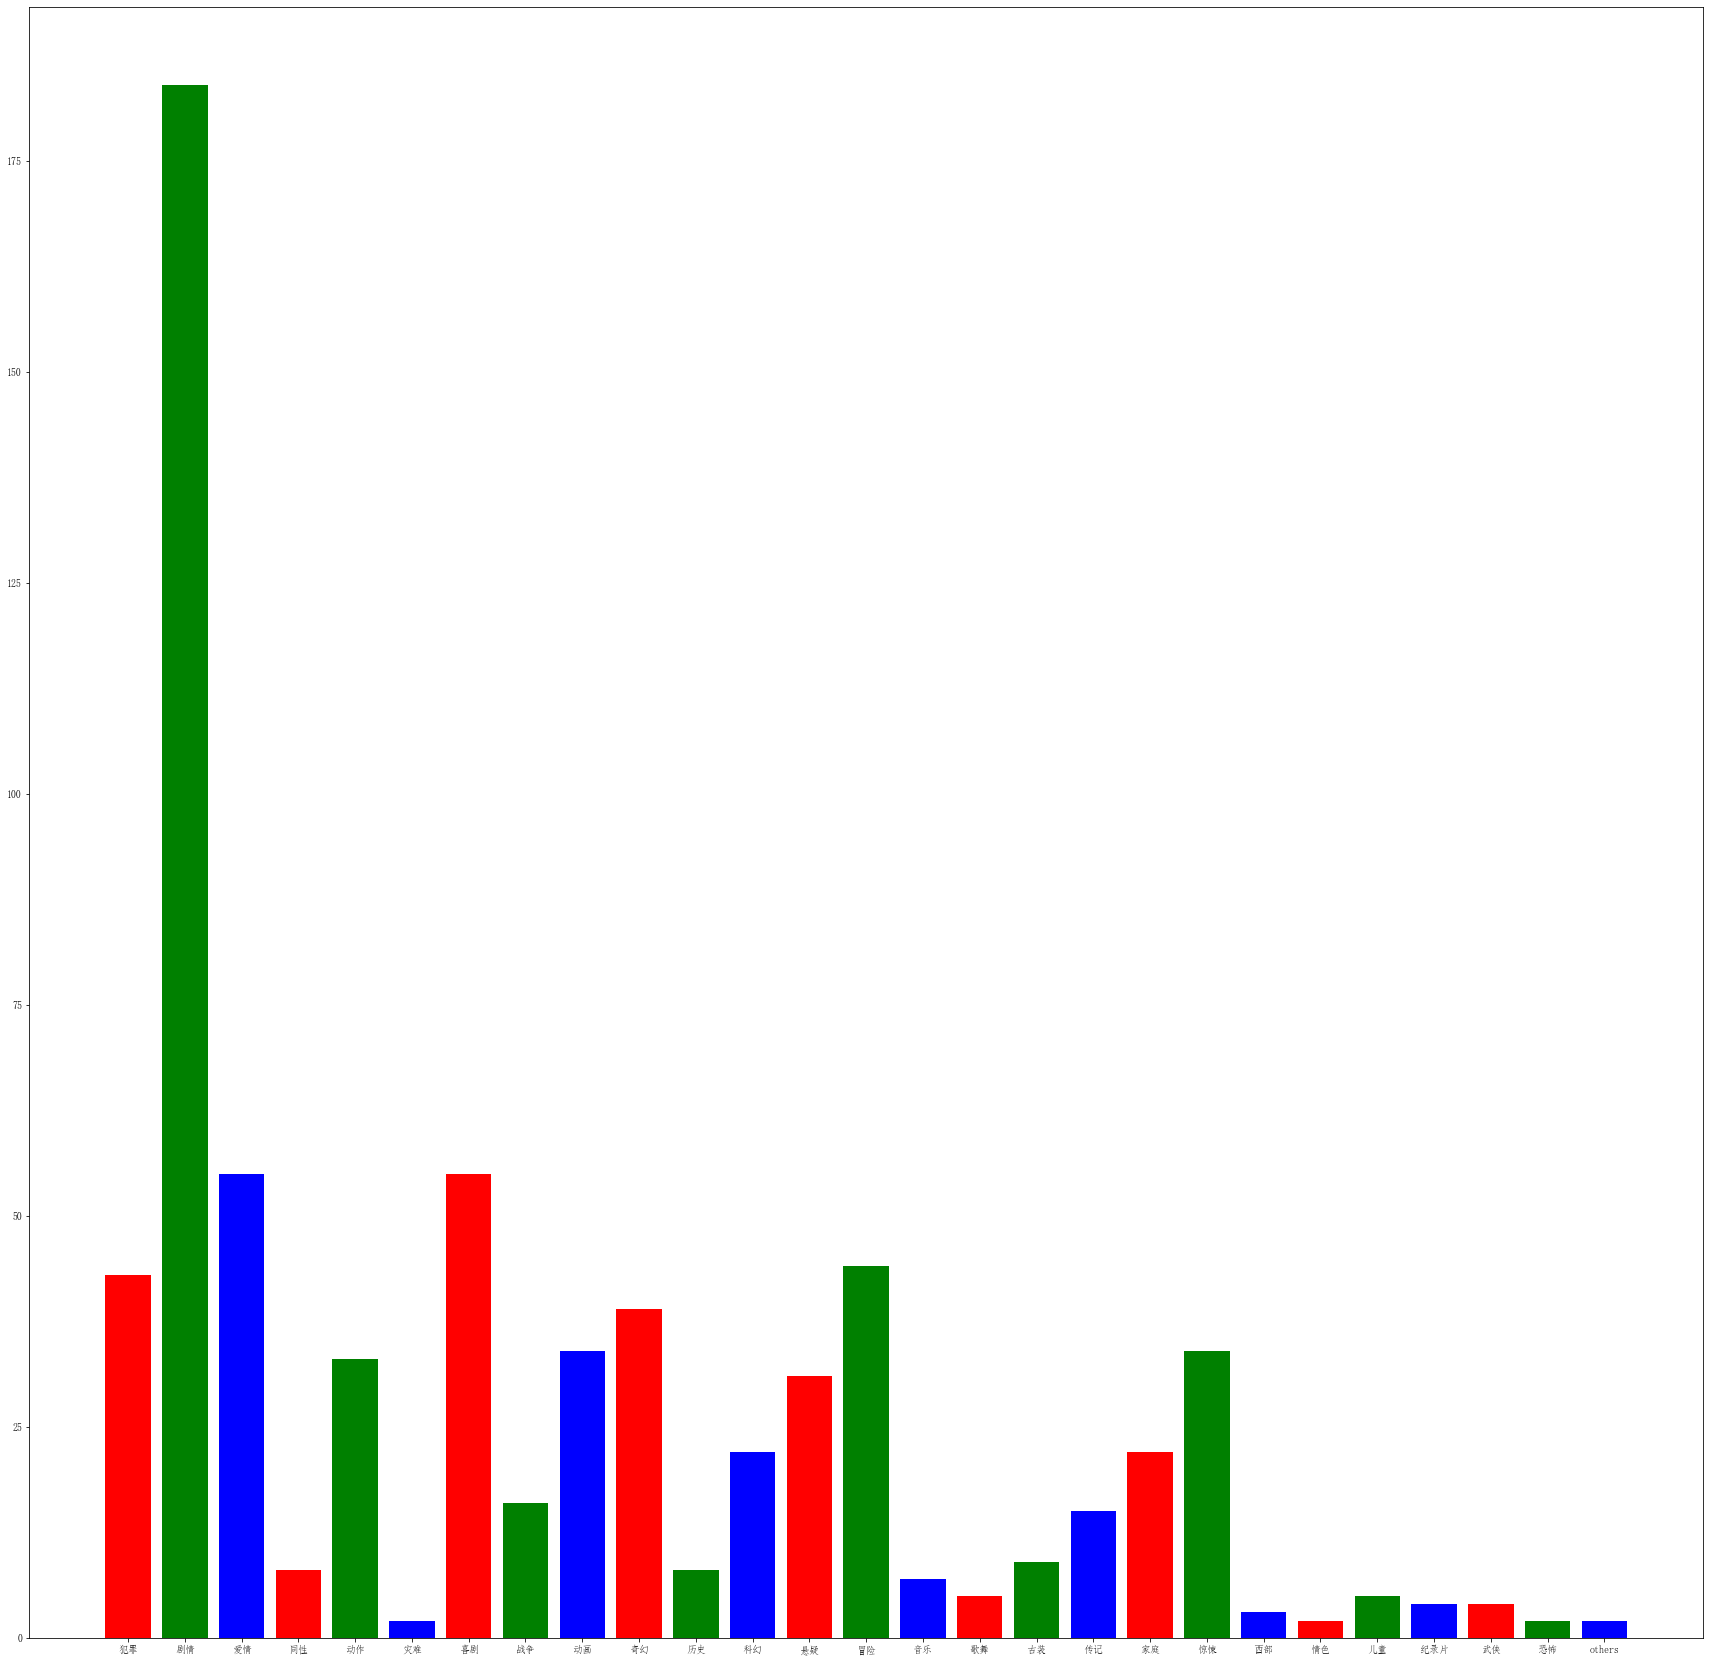

In [51]:
# due to so many options ,use histogram to draw
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111)
ax.bar(types_keys,types_values,color="rgb")
fg = plt.gcf()
fg.savefig("爬取的数据"+'/'+"首映地区.png")

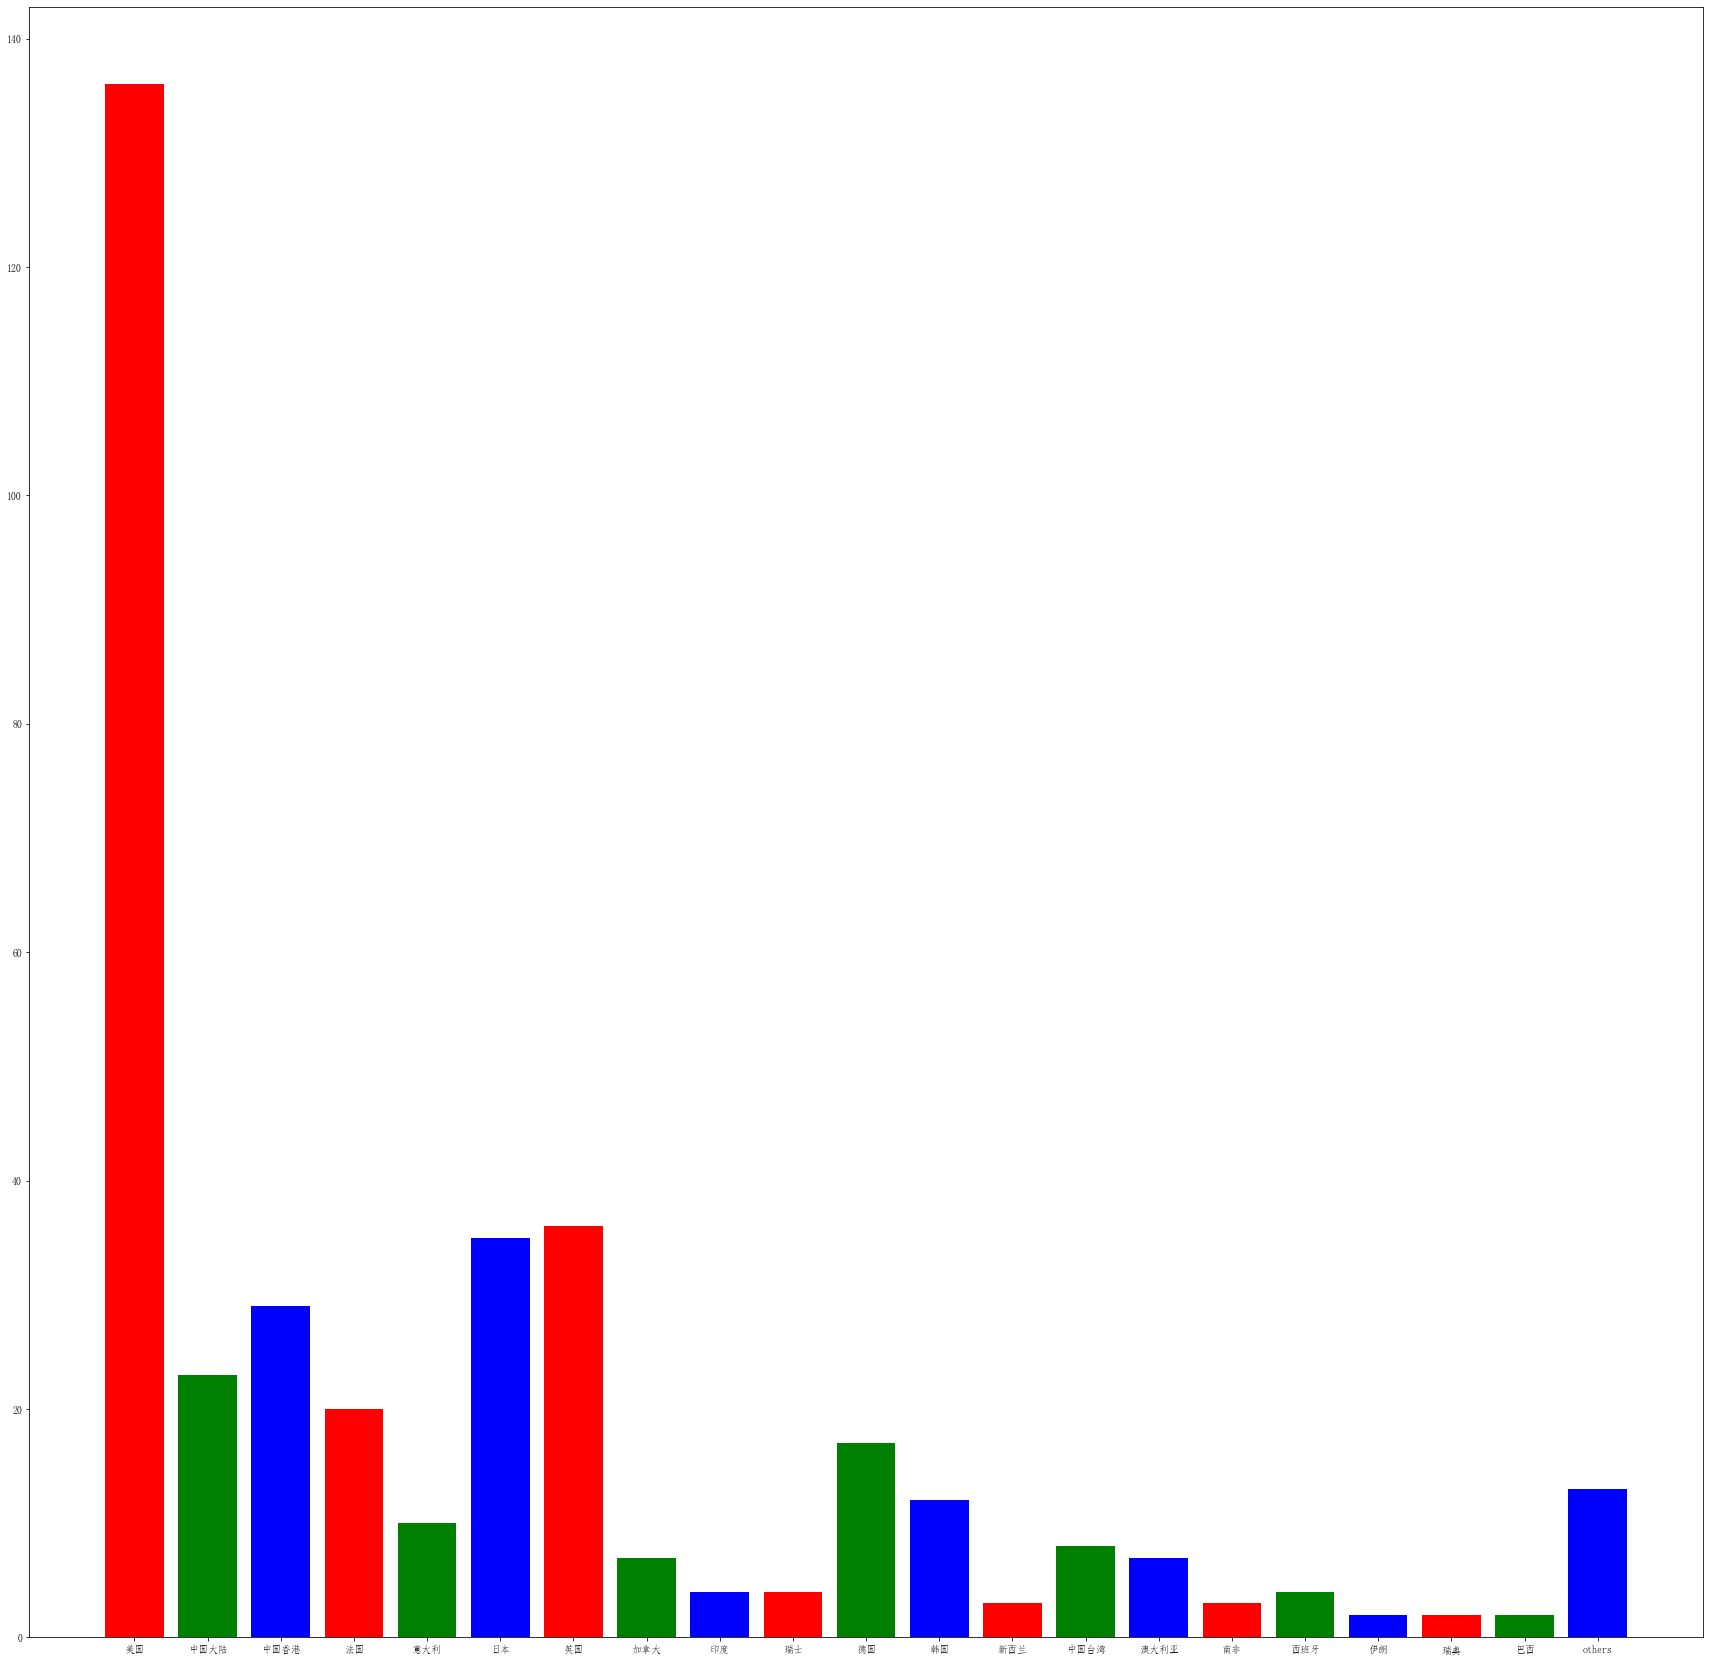

In [52]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111)
ax.bar(areas_keys,areas_values,color="rgb")
fg = plt.gcf()
fg.savefig("爬取的数据"+'/'+"电影类型.png")

电影简介中，无用数据有42个，消极简介有70个，积极简介有138个


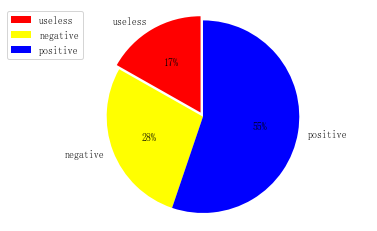

In [63]:
# use snownlp to mark
# 评论情感分析
positives = 0
negatives = 0
useless = 0
for line in introduction:
    # nan是float型
    if type(line) == float:
        useless += 1
    else:
        s = SnowNLP(line).sentiments
        if s >= 0.5:
            positives += 1
        else:
            negatives += 1
print("电影简介中，无用数据有{}个，消极简介有{}个，积极简介有{}个".format(useless,negatives,positives))
# # 饼状图
# plot.figure(figsize=(8,8))
labels = ['useless','negative','positive']
sizes = [useless,negatives,positives]
colors = ['red', 'yellow', 'blue']
explode = (0.05, 0, 0)
patches, l_text, p_text = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                                       labeldistance=1.1, autopct='%2.0f%%', shadow=False,
                                       startangle=90, pctdistance=0.6)
for t in l_text:
    t.set_size = 30
for t in p_text:
    t.set_size = 20
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
plt.grid()
plt.savefig("爬取的数据" + '/' + '简介语义分析.png')
plt.show()

电影短评中，无用数据有0个，消极简介有80个，积极简介有170个


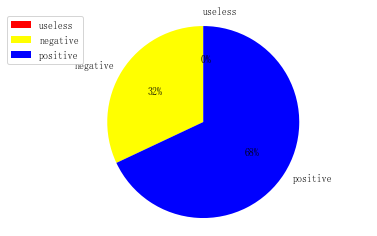

In [64]:
# use snownlp to mark
# 评论情感分析
positives = 0
negatives = 0
useless = 0
for line in comments:
    # nan是float型
    if type(line) == float:
        useless += 1
    else:
        s = SnowNLP(line).sentiments
        if s >= 0.5:
            positives += 1
        else:
            negatives += 1
print("电影短评中，无用数据有{}个，消极简介有{}个，积极简介有{}个".format(useless,negatives,positives))
# # 饼状图
# plot.figure(figsize=(8,8))
labels = ['useless','negative','positive']
sizes = [useless,negatives,positives]
colors = ['red', 'yellow', 'blue']
explode = (0.05, 0, 0)
patches, l_text, p_text = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                                       labeldistance=1.1, autopct='%2.0f%%', shadow=False,
                                       startangle=90, pctdistance=0.6)
for t in l_text:
    t.set_size = 30
for t in p_text:
    t.set_size = 20
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
plt.grid()
plt.savefig("爬取的数据" + '/' + '短评语义分析.png')
plt.show()

### 2、实现某种分类算法（随意），用于测试某种分类
+ eg：通过简介或影评对电影的类型分类
+ eg：通过演员的组合分类电影、亦或是反过来
+ 其他信息

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import joblib
from pandas.core.frame import DataFrame
import pandas as pd
import csv

f = open("爬取的数据/豆瓣250电影信息.csv",mode='r',encoding='utf-8')
csv_reader = csv.reader(f)
rows = [i for i in csv_reader]
# 开始进行数据处理
new_rows = []
for row in rows:
    if row[9] == '无':
        pass
    else:
        new_rows.append([row[4].split(r'(')[0],row[7],row[8].replace("人评价","").strip(),row[9]])
fp = open("爬取的数据/随机森林.csv",mode="w",encoding="utf-8-sig",newline="")
csv_write = csv.writer(fp)
for row in new_rows:
    csv_write.writerow(row)
fp.close()

In [102]:
pima = pd.read_csv('爬取的数据/随机森林.csv',encoding='utf-8')
pima.rename(columns={'一句话总结':'isrun'},inplace=True)

scores = []
for s in pima['isrun']:
    x = SnowNLP(s).sentiments
    if x >= 0.5:
        scores.append(1)
    else:
        scores.append(0)
# 其中最后一列是需要预测的因变量，其他特征是自变量
X = pima[['上映时间','评分','评价r数']]
y = scores

# 训练：测试=7：3
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)
rf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=36,
    max_depth=5,
    min_samples_split=10, # 定义至少多少个样本的情况下才继续分叉
    min_samples_leaf=4,
    min_weight_fraction_leaf=0.05 # 定义叶子节点最少需要包含多少个样本(使用百分比表达), 防止过拟合
    )

# 训练模型
rf.fit(X_train, y_train)
# 做预测
y_pred = rf.predict(X_test)
# 模型的准确率
print("i=number_of_trees=:",4,',accuricy=',metrics.accuracy_score(y_test, y_pred))
# 保存model
joblib.dump(rf,'rf.pkl')

KeyError: "['评价数'] not in index"